In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston.data

In [5]:
feature_names = boston.feature_names

In [6]:
target = boston.target

In [7]:
X = pd.DataFrame(data, columns=feature_names)

In [8]:
y = pd.DataFrame(target, columns=['price'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [15]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [18]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

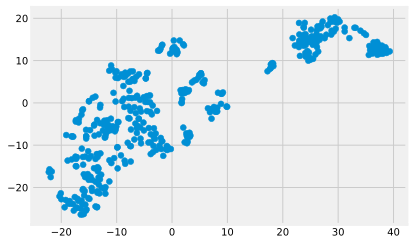

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [22]:
labels_train = kmeans.fit_predict(X_train_scaled)

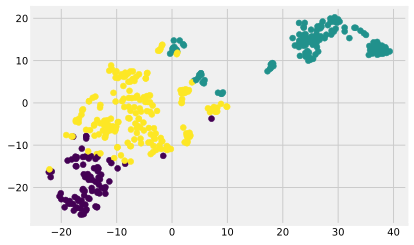

In [23]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [24]:
y_train[labels_train==0].mean()

27.78837209302326

In [25]:
y_train[labels_train==1].mean()

16.165354330708663

In [26]:
y_train[labels_train==2].mean()

24.958115183246072

Text(0.5, 0, 'Price')

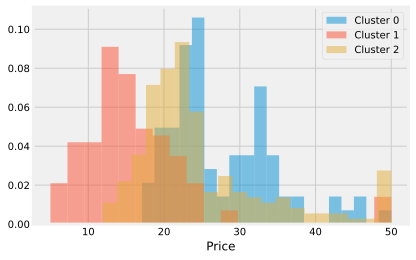

In [27]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Price')

In [28]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [29]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [30]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

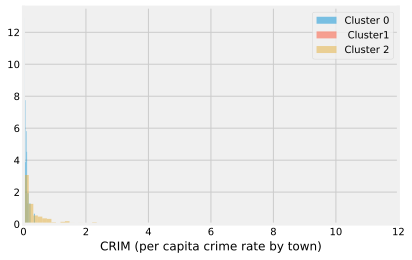

In [31]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 12)
plt.legend(['Cluster 0', ' Cluster1', 'Cluster 2'])
plt.xlabel('CRIM (per capita crime rate by town)')

### Задание 3

In [32]:
labels_test = kmeans.predict(X_test_scaled)

In [33]:
y_test[labels_test==0].mean()

31.35

In [34]:
y_test[labels_test==1].mean()

16.43714285714286

In [35]:
y_test[labels_test==2].mean()

21.860784313725492

Text(0.5, 0, 'Price')

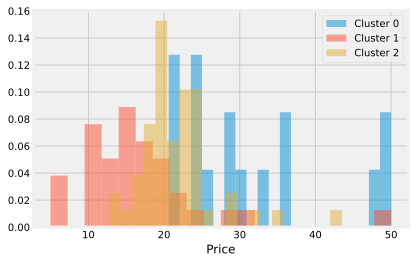

In [36]:
plt.hist(y_test[labels_test==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_test[labels_test==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_test[labels_test==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Price')

In [37]:
X_test_scaled.loc[labels_test==0, 'CRIM'].mean()

-0.40016218898562156

In [38]:
X_test_scaled.loc[labels_test==1, 'CRIM'].mean()

0.7396611726050218

In [39]:
X_test_scaled.loc[labels_test==2, 'CRIM'].mean()

-0.3771458000659118